In [15]:
import pandas as pd 
import joblib as jb
import matplotlib.pyplot as plt

In [3]:
model_1=jb.load('model_1')

In [4]:
df = pd.read_csv('test.csv')
df

,SQUARE_FT,LONGITUDE,LATITUDE,prices
0,545.171340,21.262000,73.047700,-74.753512
1,800.000000,18.966114,73.148278,-8.411473
2,1257.096513,22.592200,88.484911,46.137416
3,1400.329489,26.988300,75.584600,82.991512
4,430.477830,22.700000,72.870000,-106.180971
...,...,...,...,...
68715,856.555505,19.180000,72.963330,3.451344
68716,2304.147465,30.661104,76.746082,263.407585
68717,33362.792750,19.222101,72.988231,7169.342201
68718,1173.708920,18.496670,73.941670,74.547852


In [5]:
df=df.drop((["UNDER_CONSTRUCTION", "RERA", "BHK_NO.","POSTED_BY","READY_TO_MOVE","RESALE","BHK_OR_RK","ADDRESS"]),axis=1)
df

KeyError: "['UNDER_CONSTRUCTION' 'RERA' 'BHK_NO.' 'POSTED_BY' 'READY_TO_MOVE'\n 'RESALE' 'BHK_OR_RK' 'ADDRESS'] not found in axis"

In [6]:
df_values = df.values
df_values 

array([[ 5.45171340e+02,  2.12620000e+01,  7.30477000e+01,
        -7.47535124e+01],
       [ 8.00000000e+02,  1.89661140e+01,  7.31482780e+01,
        -8.41147298e+00],
       [ 1.25709651e+03,  2.25922000e+01,  8.84849110e+01,
         4.61374158e+01],
       ...,
       [ 3.33627928e+04,  1.92221010e+01,  7.29882310e+01,
         7.16934220e+03],
       [ 1.17370892e+03,  1.84966700e+01,  7.39416700e+01,
         7.45478520e+01],
       [ 2.43953294e+03,  1.91248960e+01,  7.28935030e+01,
         3.52809607e+02]])

In [9]:
x =df_values[:,0:3]

In [13]:
y_p=model_1.predict(x)
y_p
model_1.score(x,y_p)

1.0

In [12]:
df['prices'] = y_p
df

,SQUARE_FT,LONGITUDE,LATITUDE,prices
0,545.171340,21.262000,73.047700,-74.753512
1,800.000000,18.966114,73.148278,-8.411473
2,1257.096513,22.592200,88.484911,46.137416
3,1400.329489,26.988300,75.584600,82.991512
4,430.477830,22.700000,72.870000,-106.180971
...,...,...,...,...
68715,856.555505,19.180000,72.963330,3.451344
68716,2304.147465,30.661104,76.746082,263.407585
68717,33362.792750,19.222101,72.988231,7169.342201
68718,1173.708920,18.496670,73.941670,74.547852


In [15]:
df.to_csv('test.csv',index=False)

Text(0, 0.5, 'TARGET(PRICE_IN_LACS)')

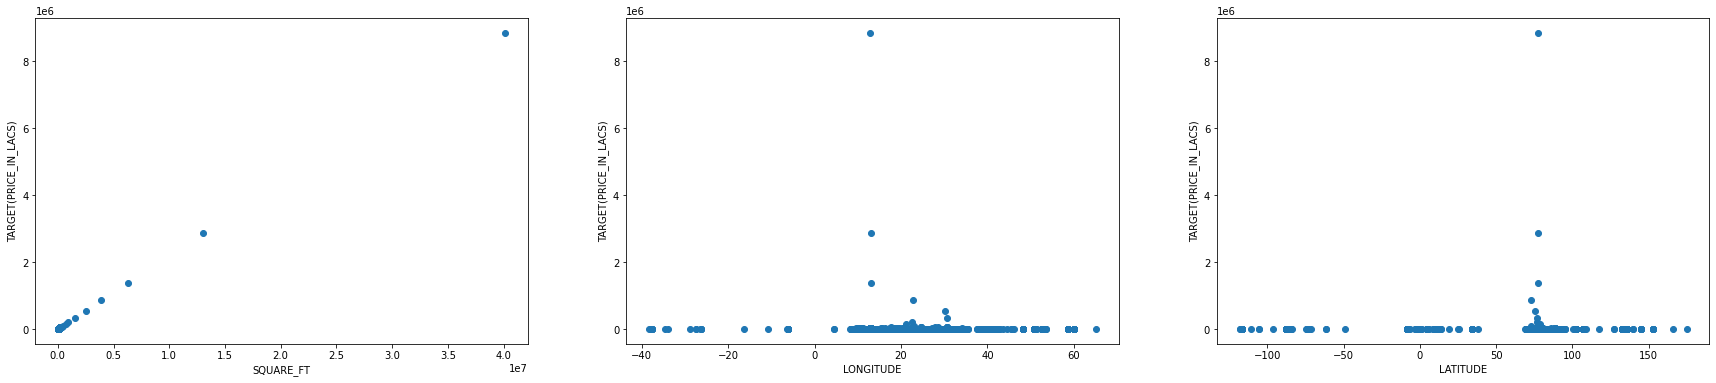

In [18]:
plt.figure(figsize=(30,6))
plt.subplot(131)
plt.scatter(df['SQUARE_FT'], df['prices'])
plt.xlabel('SQUARE_FT')
plt.ylabel('TARGET(PRICE_IN_LACS)')
plt.subplot(132)
plt.scatter(df['LONGITUDE'], df['prices'])
plt.xlabel('LONGITUDE')
plt.ylabel('TARGET(PRICE_IN_LACS)')
plt.subplot(133)
plt.scatter(df['LATITUDE'], df['prices'])
plt.xlabel('LATITUDE')
plt.ylabel('TARGET(PRICE_IN_LACS)')